import libraries and read data

In [1]:
!pip uninstall eodal -y
!pip install git+https://github.com/lukasValentin/eodal.git@landsat-dev

Found existing installation: eodal 0.2.1
Uninstalling eodal-0.2.1:
  Successfully uninstalled eodal-0.2.1
  Cloning https://github.com/lukasValentin/eodal.git (to revision landsat-dev) to c:\users\finnt\appdata\local\temp\pip-req-build-q4_jvflf
  Resolved https://github.com/lukasValentin/eodal.git to commit 8b2fce3ddcf95ab6c76a8b928bd5534f57569548
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for eodal: filename=eodal-0.2.1-py3-none-any.whl size=190148 sha256=b238f66f37503ac3996a5224761b4da75ea80e5c62ab4471f06f5d904eb76cf7
  Stored in directory: C:\Users\finnt\AppData\Local\Temp\pip-ephem-wheel-cache-004nhk5d\wheels\7f\a8\ca\6f055189509d8e9374288b56f7b03008dc5d8432456f8b8e9a
Successfully bui

  Running command git clone --filter=blob:none --quiet https://github.com/lukasValentin/eodal.git 'C:\Users\finnt\AppData\Local\Temp\pip-req-build-q4_jvflf'
  Running command git checkout -b landsat-dev --track origin/landsat-dev
  branch 'landsat-dev' set up to track 'origin/landsat-dev'.
  Switched to a new branch 'landsat-dev'


In [2]:
#import what is needed
from datetime import datetime
from pathlib import Path
from shapely.geometry import box

from eodal.config import get_settings
from eodal.core.sensors import Landsat
from eodal.core.scene import SceneCollection
from eodal.mapper.feature import Feature

In [3]:
# read data from pickled file object into SceneCollectio
fpath = Path('S:\MSc_23_TimckeFinn\data\EOdal\sample_mapper_data.pkl')
scoll = SceneCollection.from_pickle(stream=fpath)
scoll

KeyError: 'Cannot add scene: Unable to allocate 362. MiB for an array with shape (6501, 7308) and data type float64'

delete no data

In [ ]:
for scene_id, scene in scoll:
    print(scene.band_aliases)
    print(scene.band_names)

['B4', 'B3', 'B2', 'qa_pixel', 'qa_aerosol', 'qa_radsat', 'qa']
['red', 'green', 'blue', 'qa_pixel', 'qa_aerosol', 'qa_radsat', 'qa']


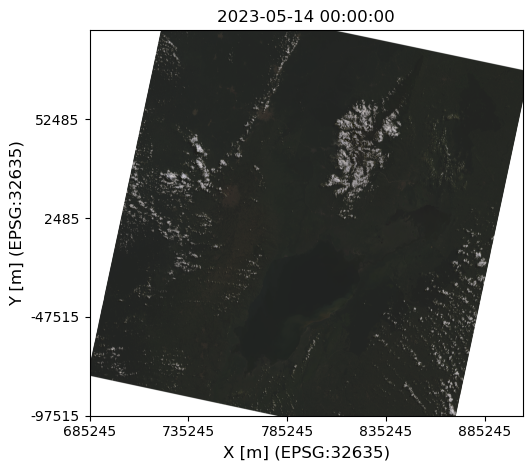

In [ ]:
%matplotlib inline  

# the scenes can be plotted
f_scenes = scoll.plot(['red', 'green', 'blue'])

Get values

In [ ]:
import numpy as np
import pandas as pd

# Specify the fill value
fill_value = -999

# Create a masked array
for scene_id, scene in scoll:
   
   masked_array = scene.get_values()

   # Convert masked array to a normal NumPy array with fill value
   normal_array = masked_array.filled(fill_value)


print(normal_array.shape)

(7, 6501, 7308)


In [ ]:
new_shape = (normal_array.shape[1] * normal_array.shape[2], normal_array.shape[0])
print (normal_array.shape)

print (new_shape)


X = normal_array[:, :, :].reshape(new_shape)

print (X.shape)

(7, 6501, 7308)
(47509308, 7)
(47509308, 7)


In [91]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters = 3)
k_means.fit(X)

X_cluster = k_means.labels_


X_cluster = X_cluster.reshape(normal_array[0, :, :].shape)
X_cluster

c:\Users\ftimcke\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(6501, 7308)


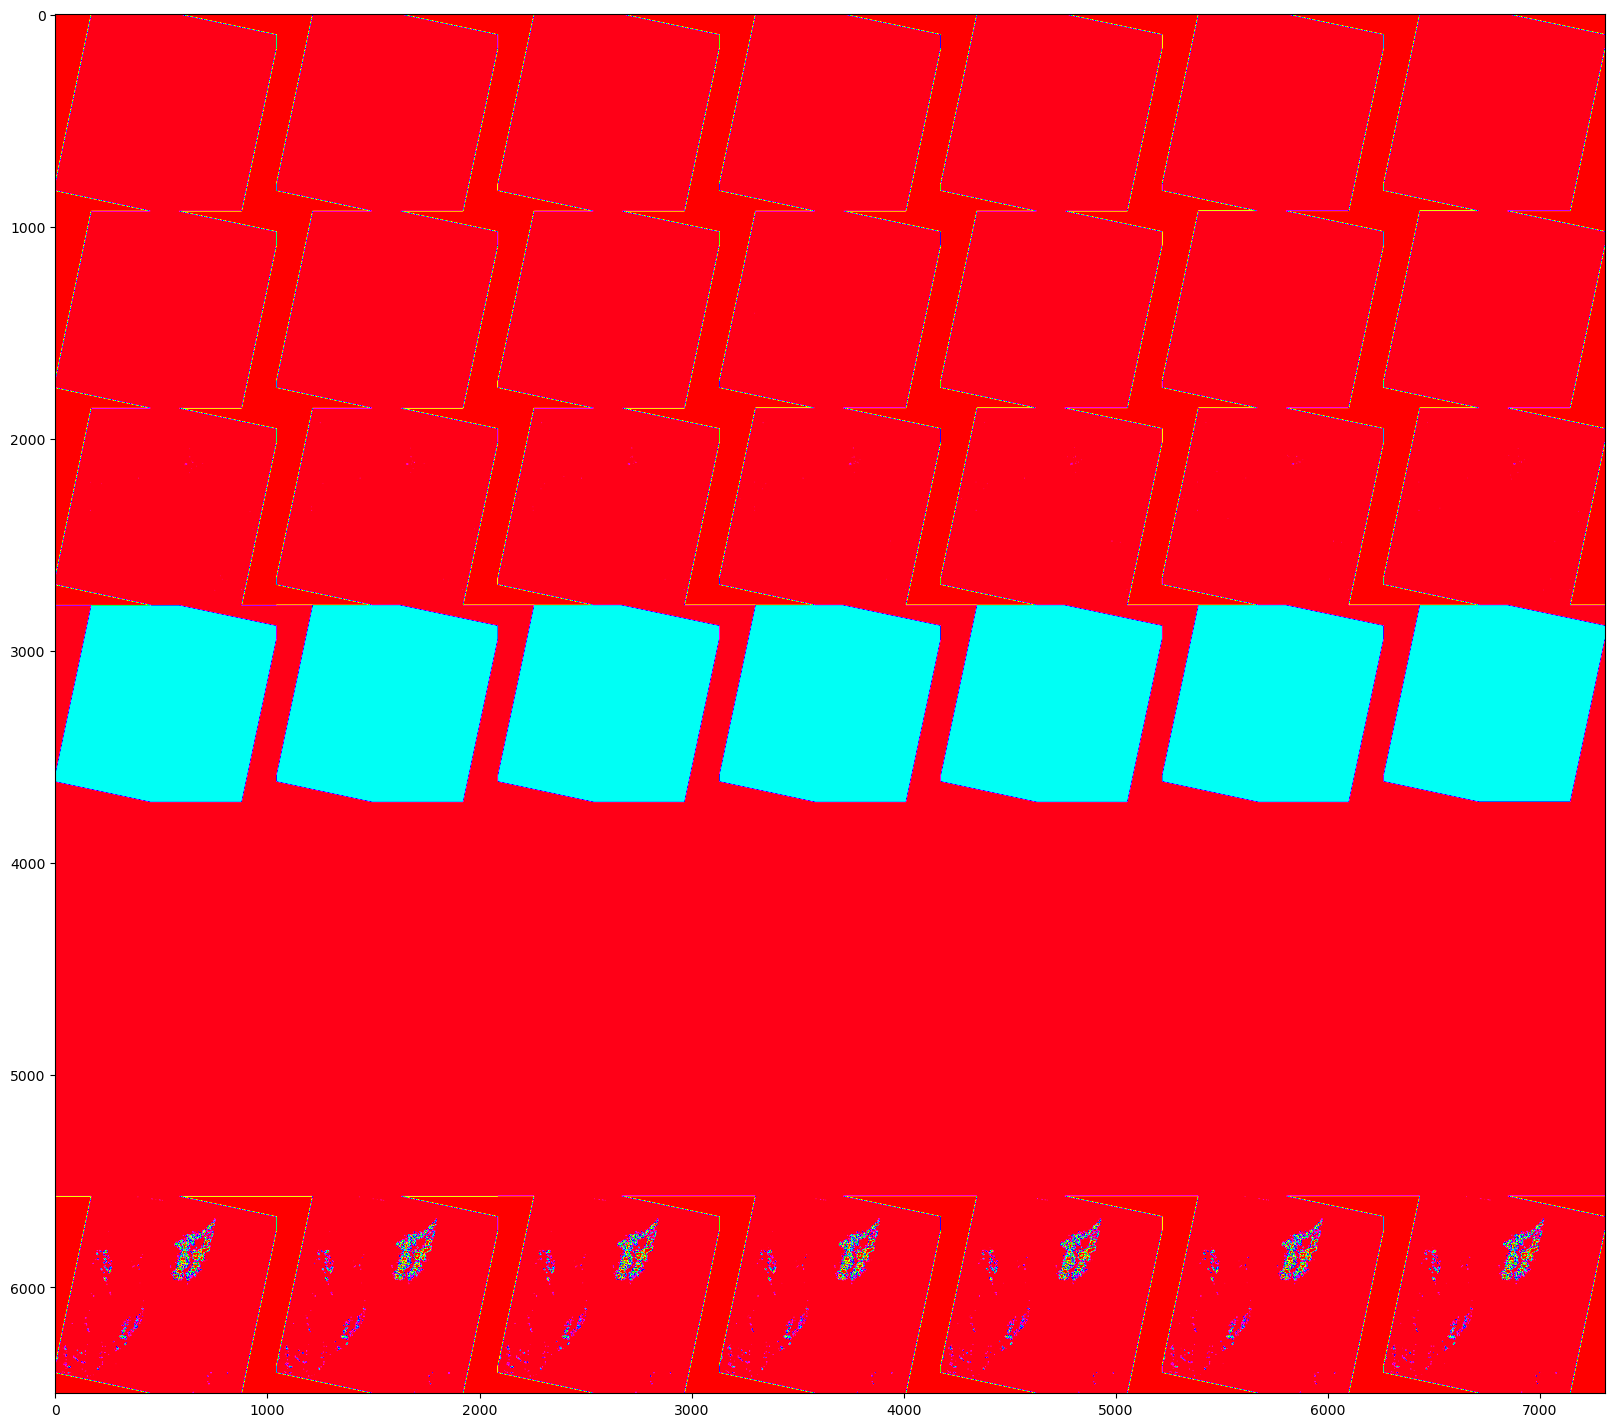

In [93]:
%matplotlib inline  

import matplotlib.pyplot as plt
print (X_cluster.shape)

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()